In [2]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

In [7]:
def max_filtering(N, I_temp):
    wall = np.full((I_temp.shape[0]+(N//2)*2, I_temp.shape[1]+(N//2)*2), -1)
    wall[(N//2):wall.shape[0]-(N//2), (N//2):wall.shape[1]-(N//2)] = I_temp.copy()
    temp = np.full((I_temp.shape[0]+(N//2)*2, I_temp.shape[1]+(N//2)*2), -1)
    for y in range(0,wall.shape[0]):
        for x in range(0,wall.shape[1]):
            if wall[y,x]!=-1:
                window = wall[y-(N//2):y+(N//2)+1,x-(N//2):x+(N//2)+1]
                num = np.amax(window)
                temp[y,x] = num
    A = temp[(N//2):wall.shape[0]-(N//2), (N//2):wall.shape[1]-(N//2)].copy()
    return A
 
def min_filtering(N, A):
    wall_min = np.full((A.shape[0]+(N//2)*2, A.shape[1]+(N//2)*2), 300)
    wall_min[(N//2):wall_min.shape[0]-(N//2), (N//2):wall_min.shape[1]-(N//2)] = A.copy()
    temp_min = np.full((A.shape[0]+(N//2)*2, A.shape[1]+(N//2)*2), 300)
    for y in range(0,wall_min.shape[0]):
        for x in range(0,wall_min.shape[1]):
            if wall_min[y,x]!=300:
                window_min = wall_min[y-(N//2):y+(N//2)+1,x-(N//2):x+(N//2)+1]
                num_min = np.amin(window_min)
                temp_min[y,x] = num_min
    B = temp_min[(N//2):wall_min.shape[0]-(N//2), (N//2):wall_min.shape[1]-(N//2)].copy()
    return B
 
def background_subtraction(I, B):
    O = I - B
    norm_img = cv.normalize(O, None, 0,255, norm_type=cv.NORM_MINMAX)
    return norm_img
 
def min_max_filtering(M, N, I):
    if M == 0:
        #max_filtering
        A = max_filtering(N, I)
        #min_filtering
        B = min_filtering(N, A)
        #subtraction
        normalised_img = background_subtraction(I, B)
    elif M == 1:
        #min_filtering
        A = min_filtering(N, I)
        #max_filtering
        B = max_filtering(N, A)
        #subtraction
        normalised_img = background_subtraction(I, B)
    return normalised_img
 

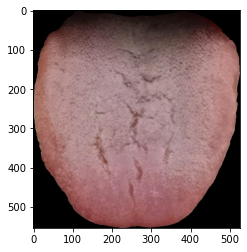

In [8]:
P = cv.imread(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\category\1\22.png')
b, g, r = cv.split(P)
plt.imshow(P[:,:,::-1])

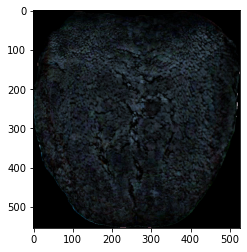

In [12]:
B = min_max_filtering(M = 1, N = 20, I = b)
G = min_max_filtering(M = 1, N = 20, I = g)
R = min_max_filtering(M = 1, N = 20, I = r)
img = cv.merge([B, G, R])
plt.imshow(img[:,:,::-1])

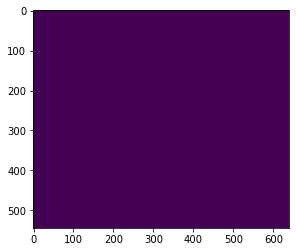

In [11]:
"""
https://blog.csdn.net/qq_15642411/article/details/79717431
"""
import numpy as np
import cv2
from skimage.morphology import remove_small_objects
im1=cv2.imread(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data21\category\0\20220519173749-1.png')
b,g,r=np.double(cv2.split(im1))
shadow_ratio = (4/np.pi)*np.arctan2((b-g),(b+g)) #mutiply 4/pi is to ensure value[0,1]
shadow_mask=shadow_ratio>0.2
#cv2.imshow("shadow_mask",np.uint8(shadow_mask*255))
shadow_mask[:5,:]=0
shadow_mask[-5:,:]=0
shadow_mask[:,:5]=0
shadow_mask[:,-5:]=0#边界上的值=0
#cv2.imshow("shadow_mask1",np.uint8(shadow_mask*255))
shadow_mask=remove_small_objects(shadow_mask, min_size=100, connectivity=3)
# opencv 中没有matlab 中类似bwareaopen的函数，二值图像面积开运算
# cv2.imshow("shadow_mask1",np.uint8(shadow_mask*255))
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel[1,0]=0
kernel[3,0]=0
kernel[1,4]=0
kernel[3,4]=0
shadow_mask1=np.uint8(shadow_mask*1)
plt.imshow(shadow_mask1*255)

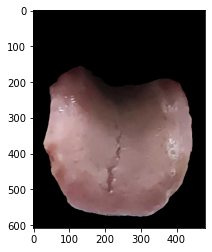

In [5]:
mask=cv2.dilate(shadow_mask1,kernel)-shadow_mask1
#cv2.imshow("boundary",np.uint8(mask*255))
#substarct shadow_mask is to get boundary
#get boundary
[row,col]=np.where(mask==1)
#for i in range(len(row)-1):
#    cv2.line(im1,(col[i],row[i]),(col[i+1],row[i+1]),(0,0,255),1)
im1[row,col,:]=im1[40,40,:]
plt.imshow(im1[:,:,::-1])